# Lab Five: Wide and Deep Networks

### Garrett Webb, Jackson Heck, and Maria Harrison

## 1. Preparation

### 1.1 Define and Prepare Class Variables

[1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). 

Dataset: Contraceptive Method Choice Data Set URL: https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

df = pd.read_csv('/Users/marycateharrison/Library/Mobile Documents/com~apple~CloudDocs/SMU/spring-2023/machine-learning/cmc.data')

df.head()

,wife_age,wife_education_level,husband_education_level,num_children,isMuslim,isNotWorking,husband_occupation,standard_of_living,isNotExposedToMedia,contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [2]:
# find data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   wife_age                   1473 non-null   int64
 1   wife_education_level       1473 non-null   int64
 2   husband_education_level    1473 non-null   int64
 3   num_children               1473 non-null   int64
 4   isMuslim                   1473 non-null   int64
 5   isNotWorking               1473 non-null   int64
 6   husband_occupation         1473 non-null   int64
 7   standard_of_living         1473 non-null   int64
 8   isNotExposedToMedia        1473 non-null   int64
 9   contraceptive_method_used  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB
None


In [3]:
categorical_features = ['isMuslim','isNotWorking','isNotExposedToMedia', 'husband_occupation', 'wife_education_level', 'husband_education_level', 'standard_of_living'];
df[categorical_features] = df[categorical_features].astype(np.object_)

In [4]:
# find data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   wife_age                   1473 non-null   int64 
 1   wife_education_level       1473 non-null   object
 2   husband_education_level    1473 non-null   object
 3   num_children               1473 non-null   int64 
 4   isMuslim                   1473 non-null   object
 5   isNotWorking               1473 non-null   object
 6   husband_occupation         1473 non-null   object
 7   standard_of_living         1473 non-null   object
 8   isNotExposedToMedia        1473 non-null   object
 9   contraceptive_method_used  1473 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 115.2+ KB
None


The categorical features are "isMuslim", "isNotWorking", "isNotExposedToMedia", "wife_education_level", "husband_education_level", "standard_of_living", and "husband_occupation". All of the categorical features are already encoded as integers. Eventually, we will deal with these integers as one-hot encodings.

"wife_age" and "num_children" are numeric, continuous features. We will eventually scale these features once we separate our dataset into training and test sets.

The target is "contraceptive_method_used", which is also a categorical feature.

In [5]:
numeric_features = ['wife_age', 'num_children']

In [6]:
for col in df:
    print(col)
    print(df[col].unique())

wife_age
[24 45 43 42 36 19 38 21 27 44 26 48 39 37 46 40 29 31 33 25 28 47 32 49
 34 20 22 30 23 35 41 17 18 16]
wife_education_level
[2 1 3 4]
husband_education_level
[3 2 4 1]
num_children
[ 3 10  7  9  8  0  6  1  2  4  5 12 11 13 16]
isMuslim
[1 0]
isNotWorking
[1 0]
husband_occupation
[2 3 1 4]
standard_of_living
[3 4 2 1]
isNotExposedToMedia
[0 1]
contraceptive_method_used
[1 2 3]


For education level, 1 refers to a low level of education while a 4 refers to a high level of education.

For the occupation of the husband, a 1 refers to a job in the "professional, technical, or clerical" field, a 2 refers to a job in the "sales or service" field, a 3 refers to a job in the "manual" field, and a 4 refers to a job in the "agricultural" field.

For the target, the contraceptive method used, a 1 refers to "no use," a 2 refers to "long-term use," and a 3 refers to "short-term use."

From the above outputs, we can see that there are no strange values in our dataset.

In [7]:
# find the number of duplicates
len(df[df.duplicated()])

48

This shows that 48 samples are duplicates. Since there over 1,000 samples and only 10 attributes, it is likely that some women will have the same answers to the survey resulting in the duplicate data. Unfortunately, it is difficult to determine if they are true duplicates since the dataset does not include any uniquely identifying information about each individual such as name, date of birth, or single identity number from an Indonesian identiy card.

Since there are no missing values and not enough information to verify the duplicates, there is no need to impute any missing information or drop any instances or features. Additionally, we believe all features might be useful to predict the target and give us information on what factors in to choosing a contraceptive method. If we could verify that the duplicates were the answers of the same woman, then we would drop the duplicates in order to ensure that there is only one instance of each woman who answered the survey. If there were missing values, then we could use different methods of imputation depending on what type of data was missing.

The dataset we are using is a subset of the data collected during the 1987 National Indonesia Contraceptive Prevalence Survey. The final dataset contains 1473 samples and 9 features, including numeric and categorical data. We will use this dataset to predict what type of contraceptive method a women would use based on the features.

### 1.2 Identify Cross-Product Features

[1 points] Identify groups of features in your data that should be combined into cross-product features. Provide justification for why these features should be crossed (or why some features should not be crossed). 

Even though our data was originally in all numeric values, we created a new pandas dataframe with string values to use for future cross-product features.

In [8]:
df_strings = df.copy()
df_strings.head()

,wife_age,wife_education_level,husband_education_level,num_children,isMuslim,isNotWorking,husband_occupation,standard_of_living,isNotExposedToMedia,contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [9]:
df_strings['wife_education_level'] = df_strings['wife_education_level'].replace([1, 2, 3, 4], ['lowest level of education', 'low level of education', 'high level of education', 'highest level of education'])
df_strings['husband_education_level'] = df_strings['husband_education_level'].replace([1, 2, 3, 4], ['lowest level of education', 'low level of education', 'high level of education', 'highest level of education'])
df_strings['isMuslim'] = df_strings['isMuslim'].replace([0, 1], ['not Muslim', 'Muslim'])
df_strings['isNotWorking'] = df_strings['isNotWorking'].replace([0, 1], ['working', 'not working'])
df_strings['husband_occupation'] = df_strings['husband_occupation'].replace([1, 2, 3, 4], ['professional', 'sales or service', 'manual', 'agricultural'])
df_strings['standard_of_living'] = df_strings['standard_of_living'].replace([1, 2, 3, 4], ['lowest standard of living', 'low standard of living', 'high standard of living', 'highest standard of living'])
df_strings['isNotExposedToMedia'] = df_strings['isNotExposedToMedia'].replace([0, 1], ['exposed to media', 'not exposed to media'])
df_strings['contraceptive_method_used'] = df_strings['contraceptive_method_used'].replace([1,2,3], ['no use', 'long-term use', 'short-term use'])

In [10]:
## separate dataframe into features and target 
X_strings = df_strings.loc[:, df_strings.columns != 'contraceptive_method_used']
y_strings = df_strings['contraceptive_method_used'].to_numpy() 

In [11]:
from sklearn.model_selection import train_test_split

X_train_strings, X_test_strings, y_train_strings, y_test_strings = train_test_split(X_strings, y_strings, test_size=.2, stratify=y_strings)

In [12]:
from sklearn.preprocessing import LabelEncoder
# define objects that can encode each variable as integer    
encoders = dict() # save each encoder in dictionary

y_train_df = pd.DataFrame(y_train_strings, columns= ['contraceptive_method_used'])
y_test_df = pd.DataFrame(y_test_strings, columns= ['contraceptive_method_used'])

# train all encoders (special case the target )
for col in categorical_features+['contraceptive_method_used']:
    if col=="contraceptive_method_used":
        # special case the target, just replace the column
        y_train_df[col] = y_train_df[col].str.strip()
        y_test_df[col] = y_test_df[col].str.strip()
        tmp = LabelEncoder()
        y_train_df[col] = tmp.fit_transform(y_train_df[col])
        y_test_df[col] = tmp.transform(y_test_df[col])
    else:
        # integer encode strings that are features
        X_train_strings[col] = X_train_strings[col].str.strip()
        X_test_strings[col] = X_test_strings[col].str.strip()
        encoders[col] = LabelEncoder() # save the encoder
        X_train_strings[col+'_int'] = encoders[col].fit_transform(X_train_strings[col])
        X_test_strings[col+'_int'] = encoders[col].transform(X_test_strings[col])

### 1.3 Choose Metric

[1 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

### 1.4 Choose Method For Dividing Data

[1 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice. 

In [13]:
## separate dataframe into features and target 
X = df.loc[:, df.columns != 'contraceptive_method_used'].to_numpy()
y = df['contraceptive_method_used'].to_numpy() 

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=8, svd_solver='randomized', random_state=1)),
                    ('clf', LogisticRegression(class_weight='balanced', random_state=1))])

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.53      0.60       129
           2       0.39      0.58      0.47        69
           3       0.48      0.45      0.47        97

    accuracy                           0.52       295
   macro avg       0.52      0.52      0.51       295
weighted avg       0.55      0.52      0.52       295



The above is a split that is stratified on the target values. This report shows a quick overview of the resulting precision, recall, f1-score, and the number of occurrences of each class.

In [16]:
uniques, counts = np.unique(y, return_counts=True)

percentages = dict(zip(uniques, counts * 100 / len(y)))

print(percentages)

{1: 42.701968771215206, 2: 22.60692464358452, 3: 34.691106585200274}


In [17]:
uniques, counts = np.unique(y_train, return_counts=True)

percentages = dict(zip(uniques, counts * 100 / len(y_train)))

print(percentages)

{1: 42.444821731748725, 2: 22.410865874363328, 3: 35.144312393887944}


As we can see, our original target set does not have equal proportion for all three classes. Thus, we want to preserve the percentage of samples for each class so we are training our model on a good portion of each class. Therefore, we decided to use Stratified K-fold cross validation.

In [18]:
uniques, counts = np.unique(y_test, return_counts=True)

percentages = dict(zip(uniques, counts * 100 / len(y_test)))

print(percentages)

{1: 43.728813559322035, 2: 23.389830508474578, 3: 32.88135593220339}


From above, we can see the percentage of each class is roughly the same in the original target set, the training set, and the testing set.

In [19]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

In [20]:
print(type(X_train))

<class 'numpy.ndarray'>


In [21]:
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Acc: %.3f' % (k+1, score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold: 1, Acc: 0.500
Fold: 2, Acc: 0.517
Fold: 3, Acc: 0.508
Fold: 4, Acc: 0.517
Fold: 5, Acc: 0.508
Fold: 6, Acc: 0.500
Fold: 7, Acc: 0.432
Fold: 8, Acc: 0.508
Fold: 9, Acc: 0.487
Fold: 10, Acc: 0.556

CV accuracy: 0.503 +/- 0.029


In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=-1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.5        0.51694915 0.50847458 0.51694915 0.50847458 0.5
 0.43220339 0.50847458 0.48717949 0.55555556]
CV accuracy: 0.503 +/- 0.029


In [23]:
## separate dataframe into features and target 
X = df.loc[:, df.columns != 'contraceptive_method_used']
y = df['contraceptive_method_used'].to_numpy() 

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

In [25]:
from sklearn.preprocessing import StandardScaler

## scale numeric continous variables 
ss = StandardScaler()
X_train[numeric_features] = ss.fit_transform(X_train[numeric_features].values)
X_test[numeric_features] = ss.transform(X_test[numeric_features].values)

In [26]:
X_train.head()

,wife_age,wife_education_level,husband_education_level,num_children,isMuslim,isNotWorking,husband_occupation,standard_of_living,isNotExposedToMedia
1141,1.886673,4,4,-0.963374,0,1,1,4,0
28,-1.021884,4,4,-1.387777,1,0,2,2,0
47,1.523104,4,4,-1.387777,1,1,2,4,0
1000,0.311205,2,2,1.158642,1,0,3,1,1
545,1.401914,4,4,1.583045,1,1,2,4,0


In [27]:
X_test.head()

,wife_age,wife_education_level,husband_education_level,num_children,isMuslim,isNotWorking,husband_occupation,standard_of_living,isNotExposedToMedia
536,-0.537124,4,4,-0.538970,1,0,1,3,0
51,2.007863,4,4,1.583045,0,1,2,4,0
452,-0.900694,3,3,-0.963374,1,1,3,1,0
896,0.795964,4,4,-0.538970,0,1,3,4,0
48,-0.779504,4,4,-0.963374,1,1,1,4,0


In [28]:
# combine the features into a single large matrix
X_train_numpy = X_train.to_numpy()
X_test_numpy = X_test.to_numpy()

In [29]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
# we have the following lists now of data that we can use with our dataframes:
print("Numeric Headers:")
pp.pprint(numeric_features) # normalized numeric data
print("\nCategorical Headers, Encoded as Integer:")
pp.pprint(categorical_features) # categorical data encoded as integers

Numeric Headers:
['wife_age', 'num_children']

Categorical Headers, Encoded as Integer:
[   'isMuslim',
    'isNotWorking',
    'isNotExposedToMedia',
    'husband_occupation',
    'wife_education_level',
    'husband_education_level',
    'standard_of_living']


## 2. Modeling

[2 points] Create at least three combined wide and deep networks to classify your data using Keras. Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. Note: use the "history" return parameter that is part of Keras "fit" function to easily access this data.

In [30]:
from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import concatenate

2023-04-16 15:34:27.688186: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
from sklearn.preprocessing import LabelEncoder

cross_columns = [
                    ['wife_education_level', 'husband_education_level'],
                    ['wife_education_level', 'isNotWorking'],
                    ['husband_education_level', 'husband_occupation', 'standard_of_living'],
                    ['isMuslim', 'isNotExposedToMedia']
                ]

# cross each set of columns in the list above
cross_col_df_names = []
for cols_list in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed_train = X_train_strings[cols_list].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = X_test_strings[cols_list].apply(lambda x: '_'.join(x), axis=1)
    
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers, stacking all possibilities
    enc.fit(np.hstack((X_crossed_train.to_numpy(),  X_crossed_test.to_numpy())))
    
    # 3. Save into dataframe with new name
    X_train_strings[cross_col_name] = enc.transform(X_crossed_train)
    X_test_strings[cross_col_name] = enc.transform(X_crossed_test)
    
    # Save the encoder used here for later:
    encoders[cross_col_name] = enc
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['wife_education_level_husband_education_level',
 'wife_education_level_isNotWorking',
 'husband_education_level_husband_occupation_standard_of_living',
 'isMuslim_isNotExposedToMedia']

In [67]:
categorical_headers_ints = [x+'_int' for x in categorical_features]

In [84]:
# get crossed columns
X_train_crossed = X_train_strings[cross_col_df_names].to_numpy()
X_test_crossed = X_test_strings[cross_col_df_names].to_numpy()

# save categorical features
X_train_cat = X_train_strings[categorical_headers_ints].to_numpy() 
X_test_cat = X_test_strings[categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  X_train_strings[numeric_features].to_numpy()
X_test_num = X_test_strings[numeric_features].to_numpy()

# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train_strings[col].max(),X_test_strings[col].max())+1
    N = len(encoders[col].classes_)
    N_reduced = int(np.sqrt(N))
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train_strings[col].max(),X_test_strings[col].max())+1
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)

# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=40,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=20,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

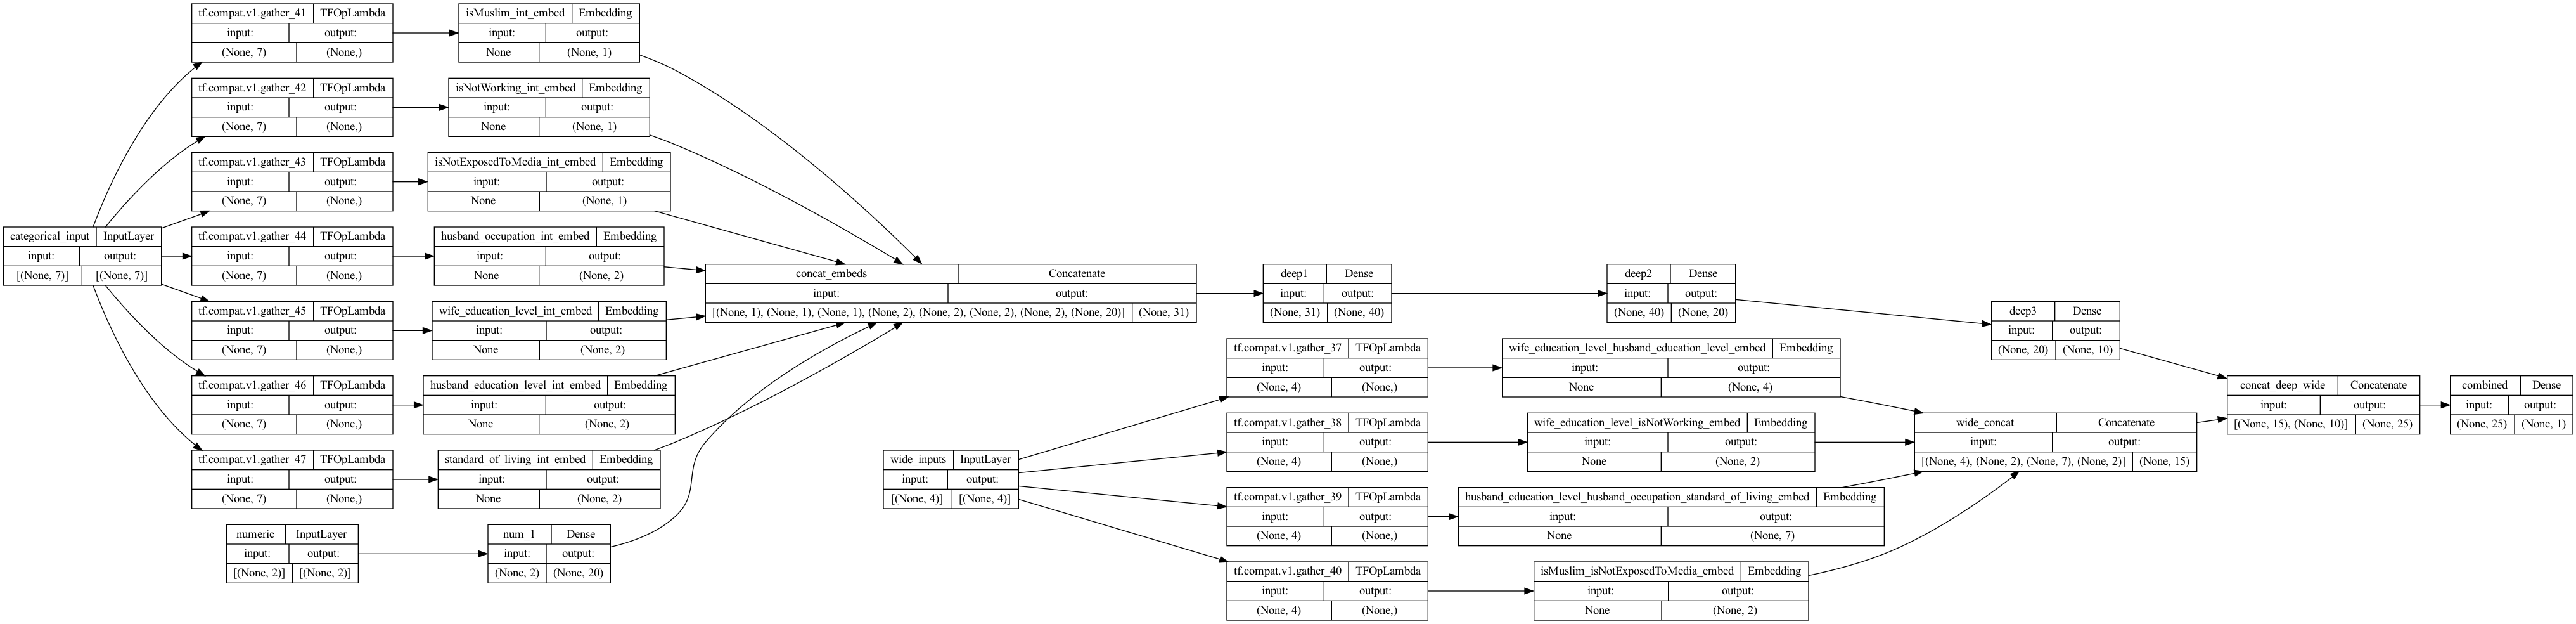

In [69]:
from tensorflow.keras.utils import plot_model
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [73]:
y_train

array([1, 1, 1, ..., 3, 1, 1])

In [70]:
%%time

model.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=10, 
                    batch_size=30, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/10
40/40 [==============================] - 1s 13ms/step - loss: 2.1492 - accuracy: 0.4270 - val_loss: 1.9808 - val_accuracy: 0.4271
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 1.9290 - accuracy: 0.4270 - val_loss: 1.8628 - val_accuracy: 0.4271
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 1.8409 - accuracy: 0.4270 - val_loss: 1.8005 - val_accuracy: 0.4271
Epoch 4/10
40/40 [==============================] - 0s 2ms/step - loss: 1.7899 - accuracy: 0.4270 - val_loss: 1.7614 - val_accuracy: 0.4271
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 1.7563 - accuracy: 0.4270 - val_loss: 1.7347 - val_accuracy: 0.4271
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 1.7327 - accuracy: 0.4270 - val_loss: 1.7155 - val_accuracy: 0.4271
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 1.7153 - accuracy: 0.4270 - val_loss: 1.7010 - val_accuracy: 0.4271
Epoch 8/10
40/40 [=

In [71]:
yhat = np.round(model.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

10/10 [==============================] - 0s 2ms/step
[[126   0   0]
 [ 67   0   0]
 [102   0   0]]
              precision    recall  f1-score   support

           1       0.43      1.00      0.60       126
           2       0.00      0.00      0.00        67
           3       0.00      0.00      0.00       102

    accuracy                           0.43       295
   macro avg       0.14      0.33      0.20       295
weighted avg       0.18      0.43      0.26       295



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 0, 'epochs')

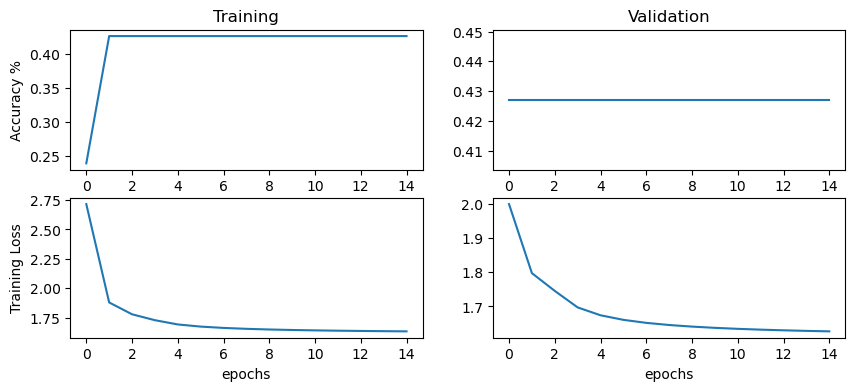

In [46]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

[2 points] Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two different number of layers. Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to select the number of layers that performs superiorly. 

[1 points] Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network). .  

## 3. Additional Analysis